In [5]:
# !unzip '/content/forecasting-unit-sales-vit-task-2.zip'

# **Exploratory Data Analysis & Feature Engineering**

In [6]:
import pandas as pd
data = pd.read_csv('/content/train.csv')
data.head(10)

,ID,date,Item Id,Item Name,ad_spend,anarix_id,units,unit_price
0,2022-04-12_B09KDTS4DC,2022-04-12,B09KDTS4DC,"NapQueen Elizabeth 8"" Gel Memory Foam Mattress...",NaN,NAPQUEEN,0.0,0.0
1,2022-04-12_B09MR2MLZH,2022-04-12,B09MR2MLZH,NapQueen 12 Inch Bamboo Charcoal Queen Size Me...,NaN,NAPQUEEN,0.0,0.0
2,2022-04-12_B09KSYL73R,2022-04-12,B09KSYL73R,"NapQueen Elsa 8"" Innerspring Mattress, Twin XL",NaN,NAPQUEEN,0.0,0.0
3,2022-04-12_B09KT5HMNY,2022-04-12,B09KT5HMNY,"NapQueen Elsa 6"" Innerspring Mattress, Twin",NaN,NAPQUEEN,0.0,0.0
4,2022-04-12_B09KTF8ZDQ,2022-04-12,B09KTF8ZDQ,"NapQueen Elsa 6"" Innerspring Mattress, Twin XL",NaN,NAPQUEEN,0.0,0.0
5,2022-04-12_B09KTJRHC7,2022-04-12,B09KTJRHC7,"NapQueen Elsa 6"" Innerspring Mattress, Full",NaN,NAPQUEEN,0.0,0.0
6,2022-04-12_B09KTMKDKJ,2022-04-12,B09KTMKDKJ,"NapQueen Elsa 8"" Innerspring Mattress, Twin",NaN,NAPQUEEN,0.0,0.0
7,2022-04-12_B09KTMLQ1N,2022-04-12,B09KTMLQ1N,"NapQueen Elsa 8"" Innerspring Mattress, Full",NaN,NAPQUEEN,0.0,0.0
8,2022-04-12_B09MR5WS3Y,2022-04-12,B09MR5WS3Y,"NapQueen Margaret 8"" Charcoal Memory Foam Matt...",NaN,NAPQUEEN,0.0,0.0
9,2022-04-12_B09KSXP3HN,2022-04-12,B09KSXP3HN,"NapQueen Elsa 8"" Innerspring Mattress, Queen",NaN,NAPQUEEN,0.0,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101490 entries, 0 to 101489
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          101490 non-null  object 
 1   date        101490 non-null  object 
 2   Item Id     101488 non-null  object 
 3   Item Name   99658 non-null   object 
 4   ad_spend    77303 non-null   float64
 5   anarix_id   101490 non-null  object 
 6   units       83592 non-null   float64
 7   unit_price  101490 non-null  float64
dtypes: float64(3), object(5)
memory usage: 6.2+ MB


**Check for the Null values**

In [8]:
data.isnull().sum()

,0
ID,0
date,0
Item Id,2
Item Name,1832
ad_spend,24187
anarix_id,0
units,17898
unit_price,0


**Replace the null values using backfill**

In [9]:
data['ad_spend'].bfill(inplace=True)

In [10]:
data.dropna(subset=['units'], inplace=True)

In [11]:
data.isnull().sum()

,0
ID,0
date,0
Item Id,0
Item Name,809
ad_spend,0
anarix_id,0
units,0
unit_price,0


**Let us understand the correlation among the columns ad_spend, units, unit_price**

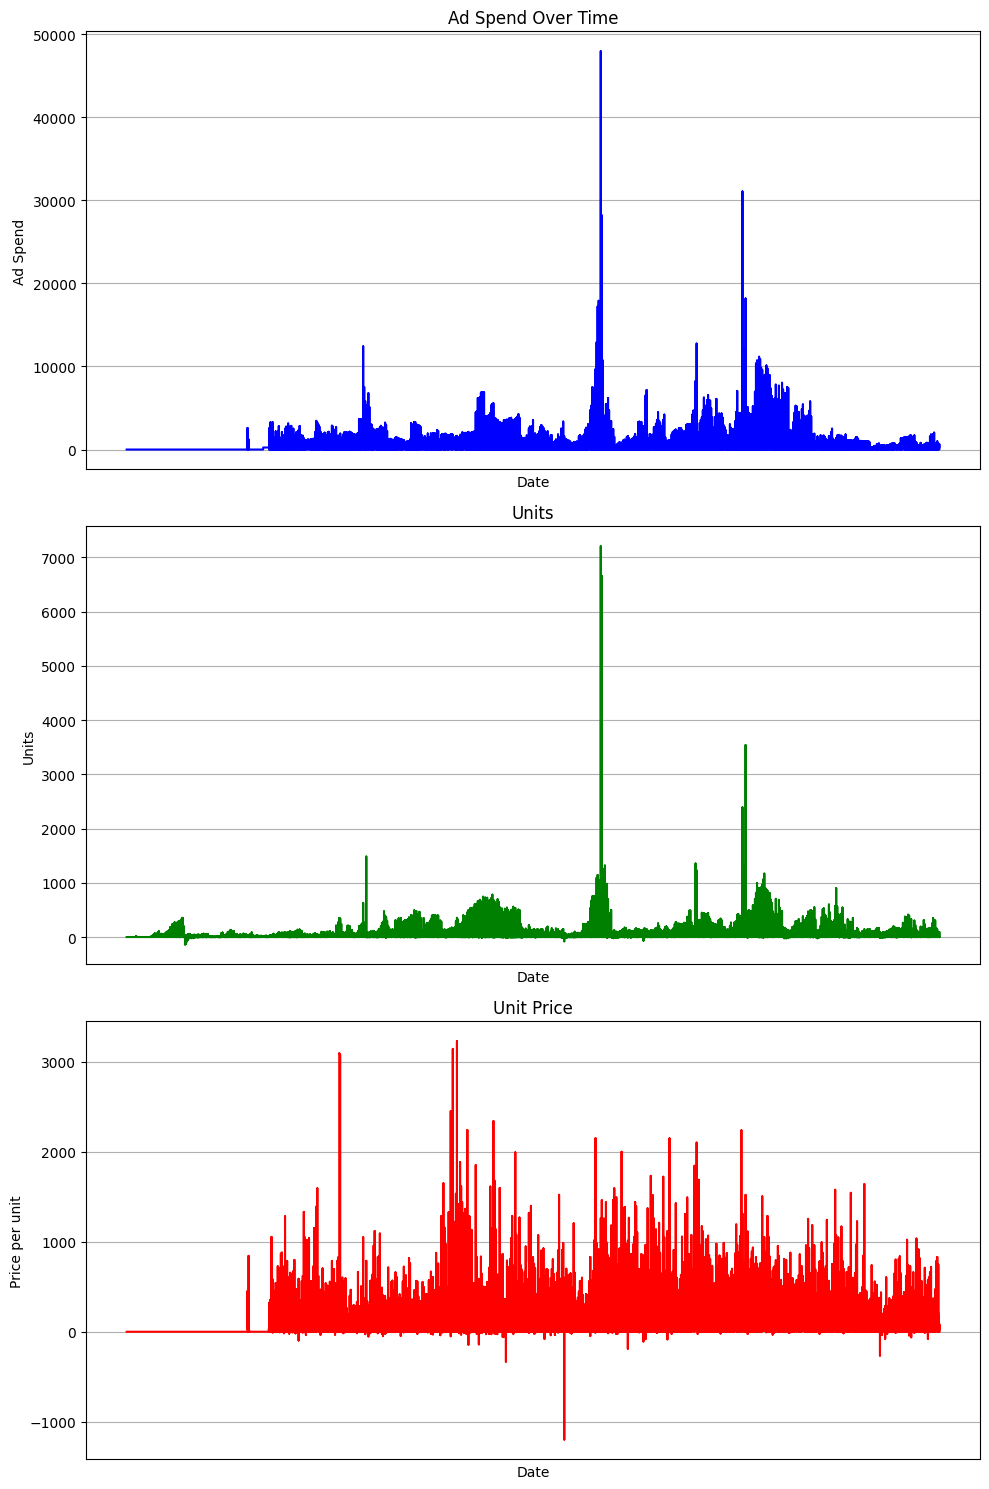

In [12]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

axs[0].plot(data['date'], data['ad_spend'], color='blue')
axs[0].set_title('Ad Spend Over Time')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Ad Spend')
axs[0].grid(True)
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_xticks([])

axs[1].plot(data['date'], data['units']*0.8, color='green')
axs[1].set_title('Units')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Units')
axs[1].grid(True)
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_xticks([])

axs[2].plot(data['date'], data['unit_price'].rolling(window=7).mean(), color='red')
axs[2].set_title('Unit Price')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Price per unit')
axs[2].grid(True)
axs[2].tick_params(axis='x', rotation=45)
axs[2].set_xticks([])

plt.tight_layout()
plt.show()

**From the above graphs, we can observe that there's a correlation between the ad_spend and the units.**

            ad_spend     units  unit_price
ad_spend    1.000000  0.709376    0.029400
units       0.709376  1.000000    0.088579
unit_price  0.029400  0.088579    1.000000


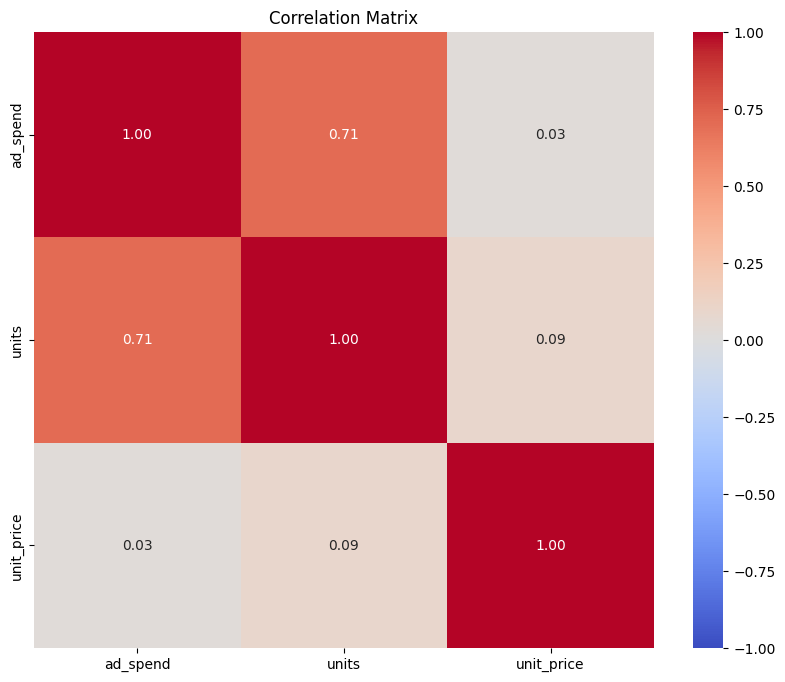

In [13]:
import seaborn as sns

rel_data = data[['ad_spend', 'units', 'unit_price']]

correlation_matrix = rel_data.corr()
print(correlation_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# **Split Data to Dependent and Target Variables**

In [14]:
data

,ID,date,Item Id,Item Name,ad_spend,anarix_id,units,unit_price
0,2022-04-12_B09KDTS4DC,2022-04-12,B09KDTS4DC,"NapQueen Elizabeth 8"" Gel Memory Foam Mattress...",0.00,NAPQUEEN,0.0,0.00
1,2022-04-12_B09MR2MLZH,2022-04-12,B09MR2MLZH,NapQueen 12 Inch Bamboo Charcoal Queen Size Me...,0.00,NAPQUEEN,0.0,0.00
2,2022-04-12_B09KSYL73R,2022-04-12,B09KSYL73R,"NapQueen Elsa 8"" Innerspring Mattress, Twin XL",0.00,NAPQUEEN,0.0,0.00
3,2022-04-12_B09KT5HMNY,2022-04-12,B09KT5HMNY,"NapQueen Elsa 6"" Innerspring Mattress, Twin",0.00,NAPQUEEN,0.0,0.00
4,2022-04-12_B09KTF8ZDQ,2022-04-12,B09KTF8ZDQ,"NapQueen Elsa 6"" Innerspring Mattress, Twin XL",0.00,NAPQUEEN,0.0,0.00
...,...,...,...,...,...,...,...,...
101480,2024-05-31_B0CR49BQRS,2024-05-31,B0CR49BQRS,NaN,0.00,NAPQUEEN,0.0,0.00
101481,2024-05-31_B0CY5LR4VX,2024-05-31,B0CY5LR4VX,NaN,0.00,NAPQUEEN,0.0,0.00
101482,2024-05-31_B0CR4C98FS,2024-05-31,B0CR4C98FS,NaN,451.42,NAPQUEEN,0.0,0.00
101484,2024-05-31_B0CY5KFQBD,2024-05-31,B0CY5KFQBD,NaN,0.00,NAPQUEEN,1.0,0.00


In [15]:
data.columns

Index(['ID', 'date', 'Item Id', 'Item Name', 'ad_spend', 'anarix_id', 'units',
       'unit_price'],
      dtype='object')

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder_item_id = LabelEncoder()
data['Item_Id_encoded'] = label_encoder_item_id.fit_transform(data['Item Id'])

Now I have built the dataset with all essential features.

**Model Building and Training with ad_spend Data**

In [17]:
from prophet import Prophet
from sklearn.preprocessing import StandardScaler

data_prophet = data[['date', 'Item_Id_encoded', 'units', 'ad_spend']].rename(columns={'date': 'ds', 'units': 'y'})

data_prophet = data_prophet.dropna()

# Feature scaling
scaler = StandardScaler()
data_prophet['ad_spend'] = scaler.fit_transform(data_prophet[['ad_spend']])

model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False, seasonality_mode='multiplicative')

model.add_regressor('ad_spend')

model.fit(data_prophet)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp9oabn5a_/x6gbiibt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9oabn5a_/e272mhl2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92710', 'data', 'file=/tmp/tmp9oabn5a_/x6gbiibt.json', 'init=/tmp/tmp9oabn5a_/e272mhl2.json', 'output', 'file=/tmp/tmp9oabn5a_/prophet_model6mg554_e/prophet_model-20240802095100.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:51:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:52:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# **Test the model**

In [18]:
test_df = pd.read_csv('/content/test.csv')
test_df

,ID,date,Item Id,Item Name,ad_spend,anarix_id,unit_price
0,2024-07-01_B09KDR64LT,2024-07-01,B09KDR64LT,"NapQueen Elizabeth 10"" Gel Memory Foam Mattres...",NaN,NAPQUEEN,0.0
1,2024-07-01_B09KDTS4DC,2024-07-01,B09KDTS4DC,"NapQueen Elizabeth 8"" Gel Memory Foam Mattress...",NaN,NAPQUEEN,0.0
2,2024-07-01_B09KDTHJ6V,2024-07-01,B09KDTHJ6V,"NapQueen Elizabeth 12"" Gel Memory Foam Mattres...",NaN,NAPQUEEN,0.0
3,2024-07-01_B09KDQ2BWY,2024-07-01,B09KDQ2BWY,"NapQueen Elizabeth 12"" Gel Memory Foam Mattres...",NaN,NAPQUEEN,0.0
4,2024-07-01_B09KDYY3SB,2024-07-01,B09KDYY3SB,"NapQueen Elizabeth 10"" Gel Memory Foam Mattres...",101.72,NAPQUEEN,1094.5
...,...,...,...,...,...,...,...
2828,2024-07-28_B0BRCW2B64,2024-07-28,B0BRCW2B64,"NapQueen Anula Green Tea 12'', Queen",11.78,NAPQUEEN,0.0
2829,2024-07-28_B0CFV6V981,2024-07-28,B0CFV6V981,NaN,1.17,NAPQUEEN,0.0
2830,2024-07-28_B0BNL5BKMK,2024-07-28,B0BNL5BKMK,"NapQueen 2'' Bamboo Charcoal Mattress Topper, ...",0.00,NAPQUEEN,0.0
2831,2024-07-28_B0CR49BQRS,2024-07-28,B0CR49BQRS,NaN,1.87,NAPQUEEN,0.0


In [19]:
test_df.isnull().sum()

,0
ID,0
date,0
Item Id,0
Item Name,344
ad_spend,1451
anarix_id,0
unit_price,0


In [20]:
test_df['ad_spend'].bfill(inplace=True)

In [21]:
test_df.fillna(0, inplace=True)

In [22]:
test_df.isnull().sum()

,0
ID,0
date,0
Item Id,0
Item Name,0
ad_spend,0
anarix_id,0
unit_price,0


In [23]:
test_df.rename(columns={'date': 'ds'})

,ID,ds,Item Id,Item Name,ad_spend,anarix_id,unit_price
0,2024-07-01_B09KDR64LT,2024-07-01,B09KDR64LT,"NapQueen Elizabeth 10"" Gel Memory Foam Mattres...",101.72,NAPQUEEN,0.0
1,2024-07-01_B09KDTS4DC,2024-07-01,B09KDTS4DC,"NapQueen Elizabeth 8"" Gel Memory Foam Mattress...",101.72,NAPQUEEN,0.0
2,2024-07-01_B09KDTHJ6V,2024-07-01,B09KDTHJ6V,"NapQueen Elizabeth 12"" Gel Memory Foam Mattres...",101.72,NAPQUEEN,0.0
3,2024-07-01_B09KDQ2BWY,2024-07-01,B09KDQ2BWY,"NapQueen Elizabeth 12"" Gel Memory Foam Mattres...",101.72,NAPQUEEN,0.0
4,2024-07-01_B09KDYY3SB,2024-07-01,B09KDYY3SB,"NapQueen Elizabeth 10"" Gel Memory Foam Mattres...",101.72,NAPQUEEN,1094.5
...,...,...,...,...,...,...,...
2828,2024-07-28_B0BRCW2B64,2024-07-28,B0BRCW2B64,"NapQueen Anula Green Tea 12'', Queen",11.78,NAPQUEEN,0.0
2829,2024-07-28_B0CFV6V981,2024-07-28,B0CFV6V981,0,1.17,NAPQUEEN,0.0
2830,2024-07-28_B0BNL5BKMK,2024-07-28,B0BNL5BKMK,"NapQueen 2'' Bamboo Charcoal Mattress Topper, ...",0.00,NAPQUEEN,0.0
2831,2024-07-28_B0CR49BQRS,2024-07-28,B0CR49BQRS,0,1.87,NAPQUEEN,0.0


In [24]:
test_df['test_item_Id'] = label_encoder_item_id.transform(test_df['Item Id'])

In [25]:
test_df = test_df.rename(columns={'date': 'ds'})

test_df['ad_spend'] = scaler.transform(test_df[['ad_spend']])

# Make predictions
preds = model.predict(test_df)

submission = test_df[['ds', 'ID']].copy()
submission['TARGET'] = preds['yhat']
submission.columns = ['date', 'ID', 'TARGET']

# Save to CSV
submission.to_csv('submission1.csv', index=False, header=True)

**Model Building and Training without ad_spend data**

In [26]:
from prophet import Prophet
from sklearn.preprocessing import StandardScaler

data_prophet = data[['date', 'Item_Id_encoded', 'units', 'ad_spend']].rename(columns={'date': 'ds', 'units': 'y'})

data_prophet = data_prophet.dropna()

# Feature scaling
scaler = StandardScaler()
data_prophet['ad_spend'] = scaler.fit_transform(data_prophet[['ad_spend']])

model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False, seasonality_mode='multiplicative')

# Skip the regressor step
model.fit(data_prophet)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp9oabn5a_/3rary6ti.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9oabn5a_/wszr5njo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35332', 'data', 'file=/tmp/tmp9oabn5a_/3rary6ti.json', 'init=/tmp/tmp9oabn5a_/wszr5njo.json', 'output', 'file=/tmp/tmp9oabn5a_/prophet_modelowyyb7b9/prophet_model-20240802095301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:53:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Testing**

In [27]:
test_df = test_df.rename(columns={'date': 'ds'})

test_df['ad_spend'] = scaler.transform(test_df[['ad_spend']])

# Make predictions
preds = model.predict(test_df)

submission = test_df[['ds', 'ID']].copy()
submission['TARGET'] = preds['yhat']
submission.columns = ['date', 'ID', 'TARGET']

# Save to CSV
submission.to_csv('submission2.csv', index=False, header=True)